![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [63]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [64]:
df_dummies = pd.get_dummies(penguins_df, columns=['sex'], drop_first=True)
print(df_dummies)

     culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
0                39.1             18.7  ...       3750.0         1
1                39.5             17.4  ...       3800.0         0
2                40.3             18.0  ...       3250.0         0
3                36.7             19.3  ...       3450.0         0
4                39.3             20.6  ...       3650.0         1
..                ...              ...  ...          ...       ...
327              47.2             13.7  ...       4925.0         0
328              46.8             14.3  ...       4850.0         0
329              50.4             15.7  ...       5750.0         1
330              45.2             14.8  ...       5200.0         0
331              49.9             16.1  ...       5400.0         1

[332 rows x 5 columns]


In [65]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
df_scaled = scaler.fit_transform(df_dummies)

# Convert back to a DataFrame
df_scaled = pd.DataFrame(df_scaled, columns=df_dummies.columns)
print(df_scaled)

     culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
0           -0.903906         0.790360  ...    -0.566948  0.993994
1           -0.830434         0.126187  ...    -0.504847 -1.006042
2           -0.683490         0.432728  ...    -1.187953 -1.006042
3           -1.344738         1.096901  ...    -0.939551 -1.006042
4           -0.867170         1.761074  ...    -0.691149  0.993994
..                ...              ...  ...          ...       ...
327          0.583904        -1.764152  ...     0.892415 -1.006042
328          0.510432        -1.457611  ...     0.799264 -1.006042
329          1.171681        -0.742347  ...     1.917074  0.993994
330          0.216543        -1.202160  ...     1.233968 -1.006042
331          1.079841        -0.537986  ...     1.482370  0.993994

[332 rows x 5 columns]


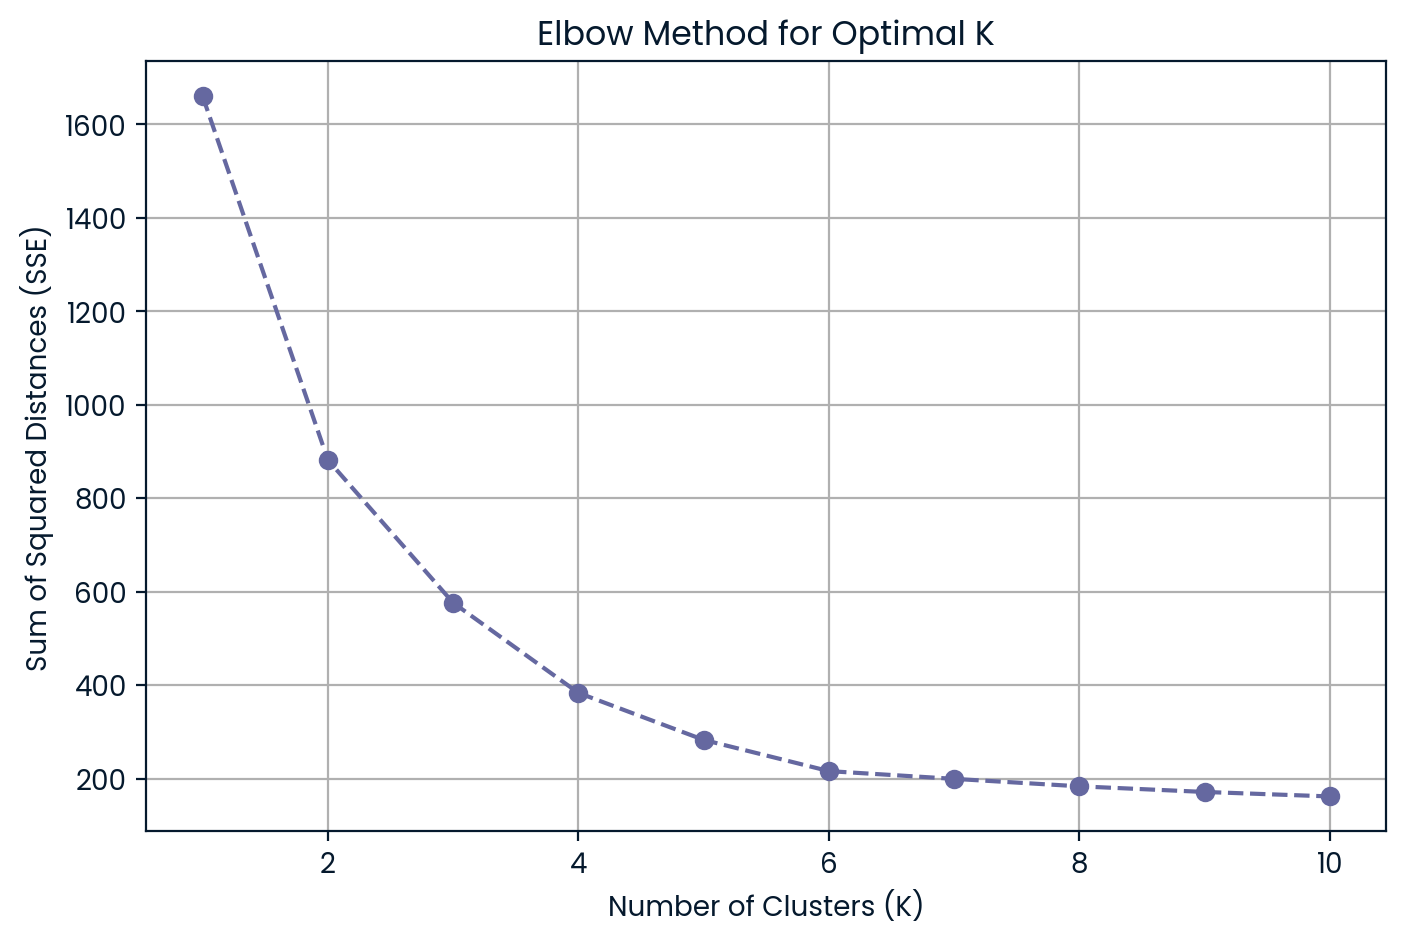

In [66]:
# Step 3: Perform KMeans and calculate SSE for different values of K
sse = []
K_range = range(1, 11)  # Testing K from 1 to 10

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    sse.append(kmeans.inertia_)  # Inertia is the sum of squared distances (SSE)

# Step 4: Plot the SSE vs K values to find the elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()

We can see the Sum of Squared Distances (SSE) decreasing sharply initially and then leveling off. This leveling-off point is typically where we find the "elbow," and it suggests the optimal number of clusters.

### Interpreting Plot:

- From the graph, the SSE decreases significantly until **K = 3** or **K = 4**, after which the rate of decrease slows down.
- The "elbow" appears to be at **K = 3**, where adding more clusters results in diminishing returns in terms of reducing the SSE.

### Optimal Number of Clusters:
Based on the Elbow Method, the optimal number of clusters for this dataset is likely **3**. This is where the "elbow" occurs in this plot, meaning that the model captures most of the data structure with three clusters without overfitting.

In [67]:
print(df_scaled.columns)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_MALE'],
      dtype='object')


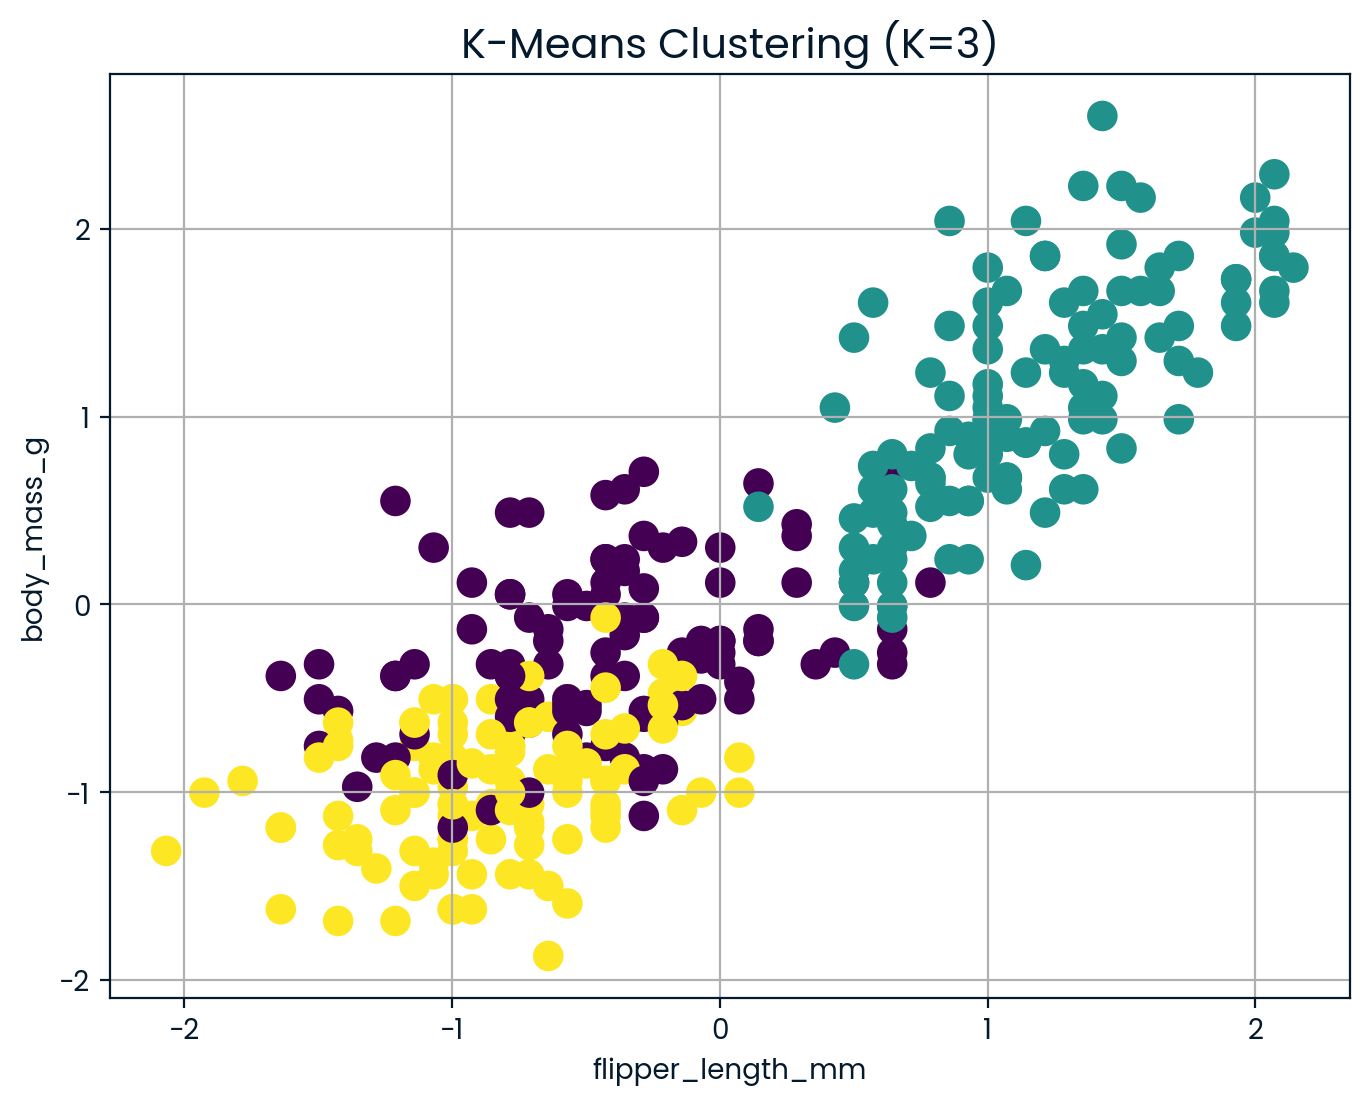

In [68]:
#Run k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(df_scaled)

labels= kmeans.predict(df_scaled)

# Step 4: Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_scaled['flipper_length_mm'], df_scaled['body_mass_g'], c=labels, cmap='viridis', marker='o', s=100)
plt.title('K-Means Clustering (K=3)', fontsize=15)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')

plt.grid(True)
plt.show()

In [69]:
df_scaled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332 entries, 0 to 331
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   culmen_length_mm   332 non-null    float64
 1   culmen_depth_mm    332 non-null    float64
 2   flipper_length_mm  332 non-null    float64
 3   body_mass_g        332 non-null    float64
 4   sex_MALE           332 non-null    float64
dtypes: float64(5)
memory usage: 13.1 KB


In [70]:
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)  # This adds the 'Cluster' column

# Group by 'Cluster' and calculate the mean of the numeric columns
cluster_characteristics = df_scaled.groupby('Cluster').mean()

#display the final characteristic table
print(cluster_characteristics)


         culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
Cluster                                     ...                       
0               -0.026226         1.000505  ...    -0.248243  0.993994
1                0.651511        -1.101696  ...     1.100373  0.019186
2               -0.698596         0.234097  ...    -0.977856 -1.006042

[3 rows x 5 columns]


To obtain a more interpretable characteristic table with the original feature values (not the standardized ones), you need to inverse transform the scaled data back to the original scale before calculating the means for each cluster.

In [71]:
original_values = scaler.inverse_transform(df_scaled.drop(columns=['Cluster']))  # Drop 'Cluster' before inverse

# Create a new DataFrame with the original values and the Cluster column
df_original = pd.DataFrame(original_values, columns=df_dummies.columns) 
df_original['Cluster'] = df_scaled['Cluster']  # Add the Cluster column back

#  Group by 'Cluster' and calculate the mean of the original numeric columns
stat_penguins = df_original.groupby('Cluster').mean()

# Display the final characteristic table
print(stat_penguins)


         culmen_length_mm  culmen_depth_mm  ...  body_mass_g  sex_MALE
Cluster                                     ...                       
0               43.878302        19.111321  ...  4006.603774  1.000000
1               47.568067        14.996639  ...  5092.436975  0.512605
2               40.217757        17.611215  ...  3419.158879  0.000000

[3 rows x 5 columns]


### Interpretation of the Output:

- **Cluster 0**:
  - Average `culmen_length_mm`: **43.88 mm**
  - Average `culmen_depth_mm`: **19.11 mm**
  - Average `body_mass_g`: **4006.60 g**
  - **100% male** penguins in this cluster (`sex_MALE = 1`)

- **Cluster 1**:
  - Average `culmen_length_mm`: **47.57 mm**
  - Average `culmen_depth_mm`: **14.99 mm**
  - Average `body_mass_g`: **5092.44 g**
  - **51.26% male** penguins in this cluster

- **Cluster 2**:
  - Average `culmen_length_mm`: **40.22 mm**
  - Average `culmen_depth_mm`: **17.61 mm**
  - Average `body_mass_g`: **3419.16 g**
  - **0% male** penguins in this cluster (all female)

### Insights:
1. **Cluster 0** contains penguins with **medium culmen length**, **larger body mass**, and all of them are male.
2. **Cluster 1** has penguins with the **longest culmen length**, the **heaviest body mass**, and a **50/50 male-to-female ratio**.
3. **Cluster 2** represents penguins with **shorter culmen length** and **lighter body mass**, and all of them are female.